1.1 Use Python to train a simple perceptron model to classify the patterns on a NAND function. To begin training, select your initial weights randomly between 2 and -2.
X1	X2	Target
-1	-1	1
-1	1	1
1	-1	1
1	1	-1


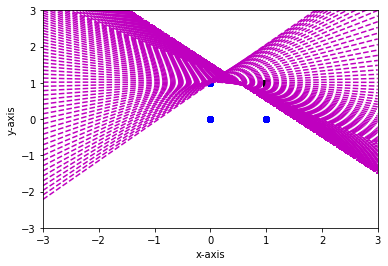

In [ ]:
#importing modules
import numpy as pyn
from matplotlib import pyplot as pyplt
import random
from IPython import display
import time

#inputs
x1 = [0,0,1,1]
x2 = [0,1,0,1]

#  Target
t = [1,1,1,0]

#ploting x and y label
pyplt.xlabel("x-axis")
pyplt.ylabel("y-axis")
pyplt.axis([-3,3,-3,3])

# Generating random weights 
w1 = random.uniform(-2,2)

w2 = random.uniform(-2,2)
# bias 
biased = random.uniform(-2,2)

learning_rate=0.5

error_appended=[]

#while stmt to loop the change in weights in neuron equation(u)
while True:
    Tot_E=0
    for i in range (4):
    #Neuron equation
        u = (x1[i]*w1) + (x2[i]*w2) + biased
        y = 1/( 1 + pyn.exp(-u))
        
        #Error value
        Error = pow((t[i]-y),2)
        
        #print("error",E)

        #change in weights for better output and to reduce error
        del_w1 = learning_rate*(x1[i]*(t[i]-y))*(y*(1-y))
        del_w2 = learning_rate*(x2[i]*(t[i]-y))*(y*(1-y))
        del_biased = learning_rate*(t[i]-y)*(y*(1-y))*1
        #print(y,i)
        
        
        Tot_E=Tot_E+Error
        
        #change of weights to minimize the error
        w1=w1+del_w1
        w2=w2+del_w2
        biased=biased+del_biased
        
    #appending error to a variable error_appended
    error_appended.append(Tot_E)
    #print("Total_error",Tot_E)
    
    #plotting co-ordinates
    for i in range(0,4):
        if t[i]>0:
            pyplt.scatter(x1[i],x2[i],marker="o",c="b")
        else:
            pyplt.scatter(x1[i],x2[i],marker="s",c="k")
    
    k = pyn.linspace(-3,3,6)
    l = -((biased+(k*w1))/w2)
        
    pyplt.plot(k,l,linestyle='--', c='m') 

    display.display(pyplt.gcf()) 

    display.clear_output(wait=True)
    time.sleep(0.000001)

    if(Tot_E<0.01):
        break;


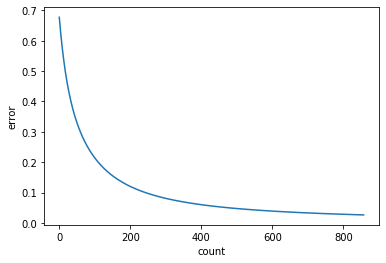

In [4]:
pyplt.figure(2)
pyplt.plot(range(len(error_appended)),error_appended)
pyplt.xlabel("count")
pyplt.ylabel("error")
pyplt.show()